In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [14]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('immigration', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536748623.0
2018-09-12 03:37:03
ICE: Deaf Detroit immigrant from Nigeria must leave
0
2
1536287849.0
2018-09-06 19:37:29
Atlanta Mayor orders city to end relationship with ICE, remove all detainees from city jail
3871
3
1536285047.0
2018-09-06 18:50:47
The Latest: Immigration enforcement agents visit Iowa farm
18
4
1535915751.0
2018-09-02 12:15:51
Suspected MS-13 member raped girl, 11, in her bedroom, police source says: report
81
5
1535760789.0
2018-08-31 17:13:09
22 faith leaders arrested outside ICE in Portland
244
6
1535613699.0
2018-08-30 00:21:39
U.S. is denying passports to Americans along the border, throwing their citizenship into question
2130
7
1535572306.0
2018-08-29 12:51:46
More than 150 arrested in massive ICE raid in Texas
2741
8
1534816036.0
2018-08-20 18:47:16
Man Sentenced to More than 17 Years in Prison for Traveling to the Dominican Republic to Engage in Sex Acts with Minors
1221
9
1534651331.0
2018-08-18 21:02:11
ICE detains man taking pregnant wife t

101
1525478190.0
2018-05-04 16:56:30
Trump administration to send 57,000 Hondurans in the U.S. home
2261
102
1525453815.0
2018-05-04 10:10:15
Crab crisis: Maryland seafood industry loses 40 percent of workforce in visa lottery
93
103
1525383313.0
2018-05-03 14:35:13
More asylum-seeking migrants admitted into U.S. port of entry; 11 from caravan arrested
18
104
1525225860.0
2018-05-01 18:51:00
ICE agent fatally shoots man who allegedly opened fire during warrant operation in San Antonio
45
105
1525209296.0
2018-05-01 14:14:56
DOJ charges 11 possible caravan members with illegally entering the US
496
106
1525138158.0
2018-04-30 18:29:18
L.A. budgets $430 million to help homeless, most of it long-term debt
217
107
1524989309.0
2018-04-29 01:08:29
Asylum-seekers in Mexico snub warnings of stern US response
78
108
1524883439.0
2018-04-27 19:43:59
LAPD Officer Arrested For Trying To Smuggle Immigrants Across Border
4156
109
1524644781.0
2018-04-25 01:26:21
Federal Judge Delays Action Against 

201
1516192021.0
2018-01-17 04:27:01
Washington state will require court order to release driver’s license info to immigration authorities
97
202
1516178805.0
2018-01-17 00:46:45
Feds planning massive Northern California immigration sweep to strike against sanctuary laws
426
203
1515984217.0
2018-01-14 18:43:37
“He was just acting crazy:” Man on Greyhound bus threatened to kill; was in US illegally
417
204
1515800860.0
2018-01-12 15:47:40
WA Dept. of Licensing regularly gave drivers' info to immigration authorities
156
205
1515633802.0
2018-01-10 17:23:22
7-Eleven probe opens new front on immigration
13
206
1515620649.0
2018-01-10 13:44:09
Birth tourism brings Russian baby boom to Miami
1530
207
1515586719.0
2018-01-10 04:18:39
U.S. judge blocks Trump move to end DACA program for immigrants
547
208
1515433040.0
2018-01-08 09:37:20
Israel offers to pay African migrants to leave, threatens jail
369
209
1515399597.0
2018-01-08 00:19:57
President steps in over Islamophobic abuse of Austria

In [15]:
#Give name
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536749e+09,2018-09-12 03:37:03,ICE: Deaf Detroit immigrant from Nigeria must ...,0
1,1.536288e+09,2018-09-06 19:37:29,Atlanta Mayor orders city to end relationship ...,3871
2,1.536285e+09,2018-09-06 18:50:47,The Latest: Immigration enforcement agents vis...,18
3,1.535916e+09,2018-09-02 12:15:51,"Suspected MS-13 member raped girl, 11, in her ...",81
4,1.535761e+09,2018-08-31 17:13:09,22 faith leaders arrested outside ICE in Portland,244
5,1.535614e+09,2018-08-30 00:21:39,U.S. is denying passports to Americans along t...,2130
6,1.535572e+09,2018-08-29 12:51:46,More than 150 arrested in massive ICE raid in ...,2741
7,1.534816e+09,2018-08-20 18:47:16,Man Sentenced to More than 17 Years in Prison ...,1221
8,1.534651e+09,2018-08-18 21:02:11,ICE detains man taking pregnant wife to hospit...,931
9,1.534575e+09,2018-08-17 23:47:37,Lawyers: Discharged Army specialist granted US...,22


In [16]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [17]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,1,1.536288e+09,2018-09-06 19:37:29,Atlanta Mayor orders city to end relationship ...,3871
1,4,1.535761e+09,2018-08-31 17:13:09,22 faith leaders arrested outside ICE in Portland,244
2,5,1.535614e+09,2018-08-30 00:21:39,U.S. is denying passports to Americans along t...,2130
3,6,1.535572e+09,2018-08-29 12:51:46,More than 150 arrested in massive ICE raid in ...,2741
4,7,1.534816e+09,2018-08-20 18:47:16,Man Sentenced to More than 17 Years in Prison ...,1221
5,8,1.534651e+09,2018-08-18 21:02:11,ICE detains man taking pregnant wife to hospit...,931
6,10,1.534405e+09,2018-08-16 00:44:09,Feds arrest suspected ISIS member in Sacrament...,1317
7,11,1.534399e+09,2018-08-15 22:48:22,Austria rejects Afghan's asylum bid because he...,415
8,13,1.534259e+09,2018-08-14 08:01:06,Armed police respond after crash outside parli...,274
9,15,1.533984e+09,2018-08-11 03:39:56,Aurora parents fighting to stop legally adopte...,706


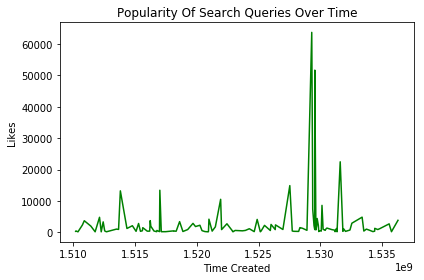

In [18]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()